In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/cgcnn_hoip/

/content/drive/.shortcut-targets-by-id/1Vwe45xepbO1SE9znf0nfQGmSCkwbprRl/cgcnn_hoip


In [ ]:
!realpath material-data/
!ls material-data

/content/drive/.shortcut-targets-by-id/1Vwe45xepbO1SE9znf0nfQGmSCkwbprRl/cgcnn_hoip/material-data
mp-ids-27430.csv  mp-ids-3402.csv  mp-ids-46744.csv  README.md


In [ ]:
!pip3 install pymatgen

     |████████████████████████████████| 2.8MB 5.7MB/s 
     |████████████████████████████████| 112kB 31.4MB/s 
     |████████████████████████████████| 71kB 9.2MB/s 
     |████████████████████████████████| 25.9MB 65.8MB/s 
     |████████████████████████████████| 296kB 47.9MB/s 
     |████████████████████████████████| 13.2MB 40.4MB/s 
     |████████████████████████████████| 256kB 49.1MB/s 
     |████████████████████████████████| 552kB 43.2MB/s 
  Created wheel for pymatgen: filename=pymatgen-2020.12.3-cp36-cp36m-linux_x86_64.whl size=3588522 sha256=14d204ce83e2840aa5eb90e96580198d9262ba032037f4c1dc8bd78385773ae8
  Stored in directory: /root/.cache/pip/wheels/cc/bf/e5/59995a59a4b574944ecb4ce504457f710c9333a9052c2e0163
Successfully built pymatgen
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.5.4 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing instal

In [ ]:
from random import sample
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import metrics
from torch.autograd import Variable
from torch.utils.data import DataLoader
from cgcnn.data import CIFData
from cgcnn.data import collate_pool, get_train_val_test_loader
from cgcnn.model import CrystalGraphConvNet
import matplotlib.pyplot as plt
import random

gpu_boole = torch.cuda.is_available()

In [ ]:
sample_dataset = CIFData('sample-regression')

In [ ]:
from pymatgen.ext.matproj import MPRester
from pymatgen.ext.matproj import MPRestError
mp_query_obj = MPRester('T1hL7XC0RoRb84hN')

In [ ]:
csv_read_obj = open('material-data/mp-ids-27430.csv')
for id in csv_read_obj:
    print(id)
    break

mp-754118



In [ ]:
id = 'mp-754118'
temp_dict = {
    'material_id':str(id)
}
# results=mp_query_obj.query({"material_id":'mp-754118'}, properties=["cif"])
results = mp_query_obj.query(temp_dict, properties=['cif'])
# print(results[0]['cif'])
print(results)

[{'cif': "# generated using pymatgen\ndata_Sr(AsO3)2\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   4.94714950\n_cell_length_b   4.94714950\n_cell_length_c   5.52334200\n_cell_angle_alpha   90.00000000\n_cell_angle_beta   90.00000000\n_cell_angle_gamma   119.99999333\n_symmetry_Int_Tables_number   1\n_chemical_formula_structural   Sr(AsO3)2\n_chemical_formula_sum   'Sr1 As2 O6'\n_cell_volume   117.06920405\n_cell_formula_units_Z   1\nloop_\n _symmetry_equiv_pos_site_id\n _symmetry_equiv_pos_as_xyz\n  1  'x, y, z'\nloop_\n _atom_site_type_symbol\n _atom_site_label\n _atom_site_symmetry_multiplicity\n _atom_site_fract_x\n _atom_site_fract_y\n _atom_site_fract_z\n _atom_site_occupancy\n  Sr  Sr0  1  0.00000000  0.00000000  0.00000000  1\n  As  As1  1  0.33333300  0.66666700  0.50000000  1\n  As  As2  1  0.66666700  0.33333300  0.50000000  1\n  O  O3  1  0.00000000  0.61751500  0.69151800  1\n  O  O4  1  0.00000000  0.38248500  0.30848200  1\n  O  O5  1  0.38248500  0.38248500  

In [ ]:
csv_read_obj = open('ABX3.csv')
for m, material in enumerate(csv_read_obj):
    if m > 0:
        print(material.strip().split(',')[0].strip("\""))
        break

mp-1206877


In [ ]:
id = 'mp-1206877'
temp_dict = {
    'material_id':str(id)
}
# results=mp_query_obj.query({"material_id":'mp-754118'}, properties=["cif"])
results = mp_query_obj.query(temp_dict, properties=['cif', 'band_gap', 'formation_energy_per_atom'])
print(results[0]['cif'])
# print(results)

# generated using pymatgen
data_Lu3PbC
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   4.78686800
_cell_length_b   4.78686800
_cell_length_c   4.78686800
_cell_angle_alpha   90.00000000
_cell_angle_beta   90.00000000
_cell_angle_gamma   90.00000000
_symmetry_Int_Tables_number   1
_chemical_formula_structural   Lu3PbC
_chemical_formula_sum   'Lu3 Pb1 C1'
_cell_volume   109.68679717
_cell_formula_units_Z   1
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  Lu  Lu0  1  0.50000000  0.00000000  0.00000000  1
  Lu  Lu1  1  0.00000000  0.50000000  0.00000000  1
  Lu  Lu2  1  0.00000000  0.00000000  0.50000000  1
  Pb  Pb3  1  0.50000000  0.50000000  0.50000000  1
  C  C4  1  0.00000000  0.00000000  0.00000000  1



In [ ]:
# import os
# from os.path import join
# from pymatgen.io.cif import CifParser
# from pymatgen import Structure

# def find_band_gap(cif_text):
#     for line in cif_text:
#         try:
#             if line[0] == '#':
#                 # print(line.split(' '))
#                 temp = line.split(' ')
#                 if temp[1] == 'Bandgap,' and temp[2] == 'GGA':
#                     return temp[-1]
#         except IndexError:
#             pass

# all_cifs = os.listdir('cif_merge')
# hoip_band_gap = open('hoip_band_gap.csv', 'w+')
# # hoip_band_gap.write('id,BandGap\n')
# for fptr in all_cifs:
#     # stuct = Structure.from_file(join('cif_merge', fptr))
#     # temp_parser = CifParser(join('cif_merge', fptr))
#     # struct = temp_parser.get_structures()[0]
#     # print(struct.)
#     # break
#     if '.cif' in fptr:
#         with open(join('cif_merge', fptr)) as fobj:
#             temp = fobj.read().split('\n')
#             prop = find_band_gap(temp)
#             # print(fptr.split('.')[0])
#             line = str(fptr.split('.')[0]) + ',' + prop + '\n'
#             # print(line)
#             hoip_band_gap.write(line)
#             fobj.close()
#         # break
# hoip_band_gap.close()

In [ ]:
class Normalizer(object):
    """Normalize a Tensor and restore it later. """
    def __init__(self, tensor):
        """tensor is taken as a sample to calculate the mean and std"""
        self.mean = torch.mean(tensor)
        self.std = torch.std(tensor)

    def norm(self, tensor):
        return (tensor - self.mean) / self.std

    def denorm(self, normed_tensor):
        return normed_tensor * self.std + self.mean

    def state_dict(self):
        return {'mean': self.mean,
                'std': self.std}

    def load_state_dict(self, state_dict):
        self.mean = state_dict['mean']
        self.std = state_dict['std']

In [ ]:
def mae(prediction, target):
    """
    Computes the mean absolute error between prediction and target
    Parameters
    ----------
    prediction: torch.Tensor (N, 1)
    target: torch.Tensor (N, 1)
    """
    return torch.mean(torch.abs(target - prediction))

def rmse(prediction, target):
    """
    Computes the root mean square error between prediction and target
    Parameters
    ----------
    prediction: torch.Tensor(N, 1)
    target: torch.Tensor(N, 1)
    """

    return torch.sqrt(torch.mean(torch.square(target - prediction)))

In [ ]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [ ]:
dataset = CIFData('cif_merge', random_seed=random.randint(1,999999))
collate_fn = collate_pool
train_loader, val_loader, test_loader = get_train_val_test_loader(dataset=dataset, \
collate_fn=collate_fn, batch_size=12, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, \
pin_memory=gpu_boole, return_test=True, train_size=None, test_size=None, val_size=None, num_workers=0)
structures, _, _ = dataset[0]
orig_atom_fea_len = structures[0].shape[-1]
nbr_fea_len = structures[1].shape[-1]
# sample1 = []
# sample2 = []
# for i in val_loader:
#     sample1 += i[-1]
# seed = random.randint(1,999999)
# dataset = CIFData('cif_merge', random_seed=seed)
# train_loader, val_loader, test_loader = get_train_val_test_loader(dataset=dataset, \
# collate_fn=collate_fn, batch_size=12, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, \
# pin_memory=gpu_boole, return_test=True, train_size=None, test_size=None, val_size=None, num_workers=0)
# for i in val_loader:
#     sample2 += i[-1]
# print(sorted(sample1) == sorted(sample2))
# print(sorted(sample1))
# print(sorted(sample2))

/usr/local/lib/python3.6/dist-packages/pymatgen/io/cif.py:745: UserWarning:

No _symmetry_equiv_pos_as_xyz type key found. Spacegroup from _symmetry_space_group_name_H-M used.

/usr/local/lib/python3.6/dist-packages/pymatgen/io/cif.py:1194: UserWarning:

Issues encountered while parsing CIF: No _symmetry_equiv_pos_as_xyz type key found. Spacegroup from _symmetry_space_group_name_H-M used.



In [ ]:
model_checkpoint = torch.load('band-gap.pth.tar')

In [ ]:
print(model_checkpoint['args']['atom_fea_len'])
# print(model_checkpoint['state_dict'].keys())
model_args = model_checkpoint['args']
print(model_args)

64
{'dataset': 'matproj', 'data_options': ['/oasis/scratch/comet/txie/temp_project/data/matproj/20170419_semi.json', 'regression', 'band_gap'], 'atom_encoder': 'custom', 'atom_encoder_param': ['/home/txie/works/cgnn/Local/embeddings/elem_prop_embedding.json'], 'task': 'regression', 'n_out': 1, 'disable_cuda': False, 'workers': 0, 'epochs': 1000, 'start_epoch': 0, 'batch_size': 256, 'lr': 0.05, 'lr_milestones': [800], 'momentum': 0.9, 'weight_decay': 0.0, 'print_freq': 10, 'resume': '', 'train_size': 16458, 'val_size': 5485, 'test_size': 5486, 'optim': 'SGD', 'atom_fea_len': 64, 'h_fea_len': 32, 'n_conv': 4, 'n_h': 1, 'cuda': True}


In [ ]:
model = CrystalGraphConvNet(orig_atom_fea_len, nbr_fea_len,
                            atom_fea_len=model_args['atom_fea_len'],
                            n_conv=model_args['n_conv'], h_fea_len=model_args['h_fea_len'], n_h=model_args['n_h'],
                            classification=False)
print(model)
def init_weights(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            torch.nn.init.kaiming_normal_(m.weight)
            if m.bias is not None:
                m.bias.data.zero_()
model.apply(init_weights)                
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion=nn.MSELoss()
normalizer = Normalizer(torch.zeros(3))
# model.load_state_dict(model_checkpoint['state_dict'])
# normalizer.load_state_dict(model_checkpoint['normalizer'])

CrystalGraphConvNet(
  (embedding): Linear(in_features=92, out_features=64, bias=True)
  (convs): ModuleList(
    (0): ConvLayer(
      (fc_full): Linear(in_features=169, out_features=128, bias=True)
      (sigmoid): Sigmoid()
      (softplus1): Softplus(beta=1, threshold=20)
      (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (softplus2): Softplus(beta=1, threshold=20)
    )
    (1): ConvLayer(
      (fc_full): Linear(in_features=169, out_features=128, bias=True)
      (sigmoid): Sigmoid()
      (softplus1): Softplus(beta=1, threshold=20)
      (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (softplus2): Softplus(beta=1, threshold=20)
    )
    (2): ConvLayer(
      (fc_full): Linear(in_features=169, out_featu

In [ ]:
def train_eval():
    
    model.train()
    loss_meter = AverageMeter()
    error_meter = AverageMeter()
    with torch.no_grad():
        for i, (input, target, batch_cif_ids) in enumerate(train_loader):
            input = (input[0].to(device), input[1].to(device), input[2].to(device),
                    [crys_idx.to(device) for crys_idx in input[3]])
            target = target.to(device)
            output = model(*input)
            loss = criterion(output, target)
            loss_meter.update(loss.data.cpu(), target.size(0))
            # calculate error
            error = mae(output.data.cpu(), target.cpu())
            error_meter.update(error, target.size(0))
    
    return loss_meter, error_meter

def val_eval():

    model.eval()
    loss_meter = AverageMeter()
    error_meter = AverageMeter()
    with torch.no_grad():
        for i, (input, target, batch_cif_ids) in enumerate(val_loader):
            input = (input[0].to(device), input[1].to(device), input[2].to(device),
                    [crys_idx.to(device) for crys_idx in input[3]])
            target = target.to(device)
            output = model(*input)
            loss = criterion(output, target)
            loss_meter.update(loss.data.cpu(), target.size(0))
            # calculate error
            error = mae(output.data.cpu(), target.cpu())
            error_meter.update(error, target.size(0))
    
    return loss_meter, error_meter

def test_eval():

    model.eval()
    loss_meter = AverageMeter()
    error_meter = AverageMeter()
    with torch.no_grad():
        for i, (input, target, batch_cif_ids) in enumerate(test_loader):
            input = (input[0].to(device), input[1].to(device), input[2].to(device),
                    [crys_idx.to(device) for crys_idx in input[3]])
            target = target.to(device)
            output = model(*input)
            loss = criterion(output, target)
            loss_meter.update(loss.data.cpu(), target.size(0))
            # calculate error
            error = mae(output.data.cpu(), target.cpu())
            error_meter.update(error, target.size(0))
    
    return loss_meter, error_meter

In [ ]:
import warnings
warnings.filterwarnings('ignore')

epochs = 1000
batch_loss = []
batch_error = []
results = []
lr = 0.001
optimizer = optim.Adam(model.parameters(), lr)
best_train_error = 1e5
best_val_error = 1e5
n_epochs_per_eval = 10
for epoch in range(epochs):
    for i, (input, target, batch_cif_ids) in enumerate(train_loader):
        model.train()
        input = (input[0].to(device), input[1].to(device), input[2].to(device),
                  [crys_idx.to(device) for crys_idx in input[3]])
        target = torch.Tensor(target).to(device)
        output = model(*input)
        # target_normed = normalizer.norm(target).to(device)
        # loss = criterion(output, target_normed)
        loss = criterion(output, target)
        batch_loss.append(loss)
        # call the optimizer
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # calculate error
        # error = mae(normalizer.denorm(output.data.cpu()), target)
        error = mae(output.data, target)
        batch_error.append(error)

    if epoch % n_epochs_per_eval == 0:
        train_loss, train_error = train_eval()
        val_loss, val_error = val_eval()
        if train_error.avg < best_train_error:
            best_train_error = train_error.avg 
            print('Step {:5d}: best train error {:.3f}'.format(epoch, best_train_error))
        if val_error.avg < best_val_error:
            best_val_error = val_error.avg
            print('Step {:5d}: best val error {:.3f}'.format(epoch, best_val_error))
            # torch.save(model.state_dict(), model_path)
        results.append([epoch, train_loss.avg, train_error.avg, val_loss.avg, val_error.avg])

warnings.resetwarnings()

Step     0: best train error 0.356
Step     0: best val error 0.361
Step    10: best train error 0.262
Step    10: best val error 0.257
Step    20: best train error 0.246
Step    30: best train error 0.200
Step    30: best val error 0.219
Step    40: best val error 0.210
Step    50: best train error 0.141
Step    50: best val error 0.173
Step    80: best train error 0.120
Step    80: best val error 0.148
Step    90: best train error 0.116
Step    90: best val error 0.146
Step   100: best train error 0.114
Step   100: best val error 0.146
Step   120: best train error 0.112
Step   130: best train error 0.112
Step   140: best train error 0.092
Step   140: best val error 0.138
Step   160: best train error 0.080
Step   160: best val error 0.127
Step   190: best train error 0.074
Step   220: best train error 0.067
Step   220: best val error 0.122
Step   290: best train error 0.056
Step   340: best train error 0.056
Step   350: best train error 0.055
Step   370: best train error 0.052
Step   

Text(0, 0.5, 'Error')

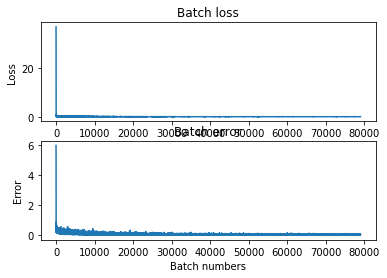

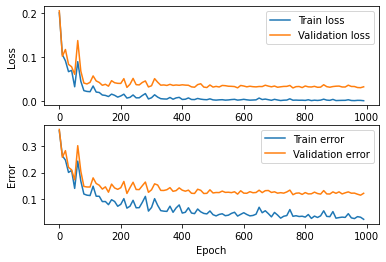

In [ ]:
plt.figure(0)
plt.subplot(2,1,1)
plt.plot(batch_loss)
plt.title('Batch loss')
plt.xlabel('Batch numbers')
plt.ylabel('Loss')
plt.subplot(2,1,2)
plt.plot(batch_error)
plt.title('Batch error')
plt.xlabel('Batch numbers')
plt.ylabel('Error')
plt.figure(1)
epoch, train_loss, train_error, val_loss, val_error = zip(*results)
plt.subplot(2,1,1)
plt.plot(epoch, train_loss, epoch, val_loss)
plt.legend(['Train loss', 'Validation loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplot(2,1,2)
plt.plot(epoch, train_error, epoch, val_error)
plt.legend(['Train error', 'Validation error'])
plt.xlabel('Epoch')
plt.ylabel('Error')
# print(results)

In [ ]:
val_loss, val_error = val_eval()
print(val_error.avg)
test_loss, test_error = test_eval()
print('test loss is {:.3f}, test error is {:.3f}'.format(test_loss.avg, test_error.avg))
# with 500 epochs, the loss is 0.031 test error 0.123. 
# with 1000 epochs, the loss is 0.027 test error is 0.108 
# Might need to increase capcity

tensor(0.1252)


/usr/local/lib/python3.6/dist-packages/pymatgen/io/cif.py:745: UserWarning:

No _symmetry_equiv_pos_as_xyz type key found. Spacegroup from _symmetry_space_group_name_H-M used.

/usr/local/lib/python3.6/dist-packages/pymatgen/io/cif.py:1194: UserWarning:

Issues encountered while parsing CIF: No _symmetry_equiv_pos_as_xyz type key found. Spacegroup from _symmetry_space_group_name_H-M used.

/usr/local/lib/python3.6/dist-packages/pymatgen/io/cif.py:1194: UserWarning:

Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
No _symmetry_equiv_pos_as_xyz type key found. Spacegroup from _symmetry_space_group_name_H-M used.



test loss is 0.027, test error is 0.119


In [ ]:
torch.save(model.state_dict(), './hoip_training_checkpt')